
# Pengantar Heuristik

1. Heuristik Search seringkali diidektikan dengan  **Besat First Search**
2. Disebut Beast First Search, karena teknik ini akan **memilih node (state) terbaik** untuk langkah berikutnya
3. Node terbaik akan dipilih berdasarkan fungsi f(n)

# Fungsi Heuristik 
1. Suatu Fungsi Heuristik dikatakan baik jika bisa memberikan biaya perkiraan yang mendekati biaya sebenarnya. 
2. Semakin mendekati biaya sebenarnya fungsi Heuristik tersebut semakin baik. 

contoh : 

Dalam kasus pencarian rute terpendek, biaya sebenarnya adalah panjang jalan raya yang sebenarnya (11km). sedangkan, fungsi heuristiknya adalah garis lurus dari kota A ke kota B (2km). (lihat gambar dibawah)

Fungsi heuristik sering kali dinotasikan dengan h(n). 


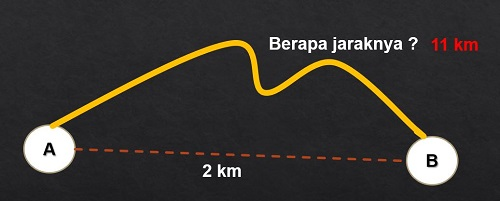

# Ada 2 algoritma Best First Search : 
1. Greedy Best First Search
2. A* Search (A star Search)

  Note : Kedua teknik tersebut pada dasarnya sama, yang membedakan hanyalah fungsi f(n) untuk mendapatkan node terbaiknya saja




---
Penjelasan Lengkap 

---

# Greedy 

1. Algoritma ini merupakan algoritma Best First Search yang paling sederhana 
2. Algortima ini hanya memperhitungkan biaya perkiraan saja

        f(n) = h'(n)

Contoh Kasus : 


Menentukan jalur tercepat dari starting point (yang bericon user) ke end point (bericon star). 

1. Langkah 1 hitung h(n) ==> fungsi heuristik / tanpa memperhitungkan adanya obstacle. pada kasus ini h(n) dapat dilihat pada gambar dibawah : 

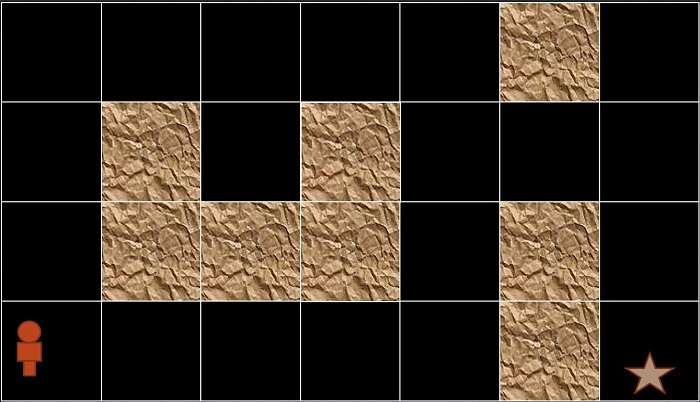

2. Langkah 2 : Membuat Tree dari permasalahan, dan menentukan jalur tercepat berdasarkan nilai dari h(n). maka hasil tercepat dari permasalahan dapat dilihat dari gambar dibawah : 

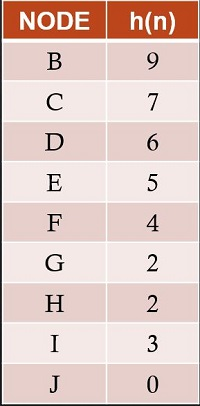




---
# A * Search (A Star Search)

Berbeda dengan Greedy algoritma ini akan menghitung fungsi Heuristik dengan cara menambahkan biaya sebenarnya dengan biaya perkiraan. sehingga didapatkan rumus 
    
    f(n) = g(n) + h'(n)

    g(n) = Biaya sebenarnya dari node awal ke node n
    h'(n) = biaya perkiraan dari node n ke node tujuan. 

Contoh Kasus : 

Menentukan jalur tercepat dari start point (icon user) ke end point (icon star)

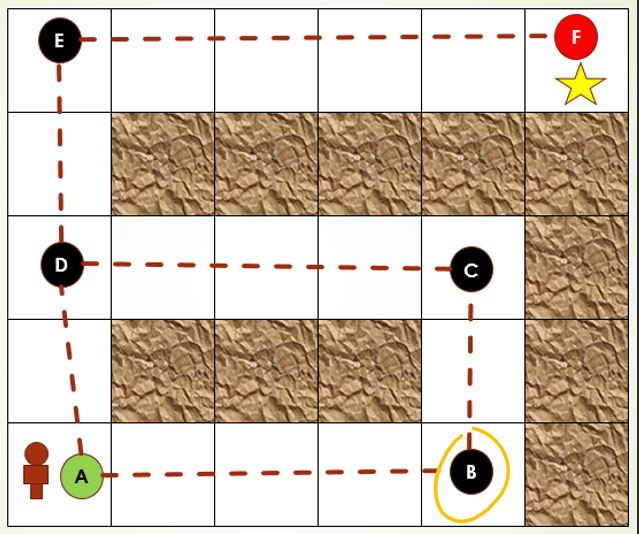

Note : kotak yang berbentuk batu dinamakan obstacle, dalam hal ini dapat diartikan bahwa obstacle tidak dapat dilewati. 

Pengerjaan : 

1. Langkah 1 : menentukan nilai heuristic atau nilau h(n)

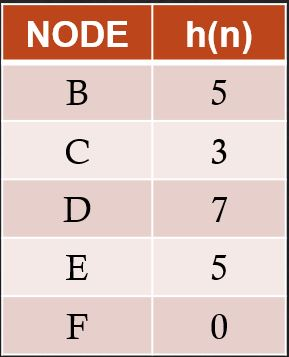

2. Langkah 2 : Membuat Graph dari persoalan, dan menghitung biaya sebenarnya g(n).
3. menentukan jalur tercepat

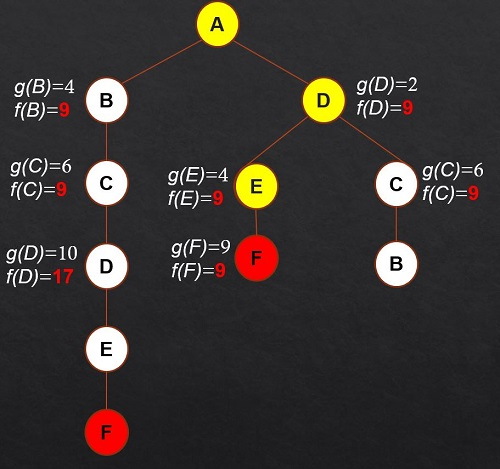

# Let's Code Greedy Search !!

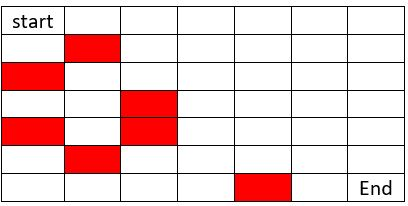

Note : 
1. Warna merah merupakan obstacle dimana tidak dapat dilewati 
2. start, merupakan titik awal 
3. end, merupakan titik akhir atau titik yang dituju

In [ ]:
 
from typing import List, Tuple
 
grid = [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],  # 0 merupakan area tanpa obstacle, sedangkan 1 merupakan obstacle yang tidak boleh dilewati 
    [1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
]
 
delta = ([-1, 0], [0, -1], [1, 0], [0, 1])  # up, left, down, right
 
 
class Node:
    """
    >>> k = Node(0, 0, 4, 5, 0, None)
    >>> k.calculate_heuristic()
    9 
    >>> n = Node(1, 4, 3, 4, 2, None)
    >>> n.calculate_heuristic()
    2
    """
 
    def __init__(self, pos_x, pos_y, goal_x, goal_y, g_cost, parent):
        self.pos_x = pos_x
        self.pos_y = pos_y
        self.pos = (pos_y, pos_x)
        self.goal_x = goal_x
        self.goal_y = goal_y
        self.g_cost = g_cost
        self.parent = parent
        self.f_cost = self.calculate_heuristic()
 
    def calculate_heuristic(self) -> float:
        dy = abs(self.pos_x - self.goal_x)
        dx = abs(self.pos_y - self.goal_y)
        return dx + dy
 
    def __lt__(self, other) -> bool:
        return self.f_cost < other.f_cost
 
 
class GreedyBestFirst:
    """
    >>> gbf = GreedyBestFirst((0, 0), (len(grid) - 1, len(grid[0]) - 1))
    >>> [x.pos for x in gbf.get_successors(gbf.start)]
    [(1, 0), (0, 1)]
    >>> (gbf.start.pos_y + delta[3][0], gbf.start.pos_x + delta[3][1])
    (0, 1)
    >>> (gbf.start.pos_y + delta[2][0], gbf.start.pos_x + delta[2][1])
    (1, 0)
    >>> gbf.retrace_path(gbf.start)
    [(0, 0)]
    >>> gbf.search()  # doctest: +NORMALIZE_WHITESPACE
    [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (6, 1),
     (6, 2), (6, 3), (5, 3), (5, 4), (5, 5), (6, 5), (6, 6)]
    """
 
    def __init__(self, start, goal):
        self.start = Node(start[1], start[0], goal[1], goal[0], 0, None)
        self.target = Node(goal[1], goal[0], goal[1], goal[0], 99999, None)
 
        self.open_nodes = [self.start]
        self.closed_nodes = []
 
        self.reached = False
 
    def search(self) -> List[Tuple[int]]:
        """
        Mencari jalur,
        jika jalur tidak ditemukan, maka hanya posisi awal yang dikembalikan
        """
        while self.open_nodes:
            # open nodes diurutkan menggunakan __lt__
            self.open_nodes.sort()
            current_node = self.open_nodes.pop(0)
 
            if current_node.pos == self.target.pos:
                self.reached = True
                return self.retrace_path(current_node)
 
            self.closed_nodes.append(current_node)
            successors = self.get_successors(current_node)
 
            for child_node in successors:
                if child_node in self.closed_nodes:
                    continue
 
                if child_node not in self.open_nodes:
                    self.open_nodes.append(child_node)
                else:
                    # mengambil jalur terbaik saat ini
                    better_node = self.open_nodes.pop(self.open_nodes.index(child_node))
 
                    if child_node.g_cost < better_node.g_cost:
                        self.open_nodes.append(child_node)
                    else:
                        self.open_nodes.append(better_node)
 
        if not (self.reached):
            return [self.start.pos]
 
    def get_successors(self, parent: Node) -> List[Node]:
        """
        mengembalikan list dari successors (baik di grid maupun ruang kosong)
        """
        successors = []
        for action in delta:
            pos_x = parent.pos_x + action[1]
            pos_y = parent.pos_y + action[0]
 
            if not (0 <= pos_x <= len(grid[0]) - 1 and 0 <= pos_y <= len(grid) - 1):
                continue
 
            if grid[pos_y][pos_x] != 0:
                continue
 
            successors.append(
                Node(
                    pos_x,
                    pos_y,
                    self.target.pos_y,
                    self.target.pos_x,
                    parent.g_cost + 1,
                    parent,
                )
            )
        return successors
 
    def retrace_path(self, node: Node) -> List[Tuple[int]]:
        """
        menelusuri kembali jalur dari parents ke parents sampai node awal
        """
        current_node = node
        path = []
        while current_node is not None:
            path.append((current_node.pos_y, current_node.pos_x))
            current_node = current_node.parent
        path.reverse()
        return path
 
 
if __name__ == "__main__":
    init = (0, 0)
    goal = (len(grid) - 1, len(grid[0]) - 1)
    for elem in grid:
        print(elem)
 
    print("------")
 
    greedy_bf = GreedyBestFirst(init, goal)
    path = greedy_bf.search()
 
    for elem in path:
        grid[elem[0]][elem[1]] = 2
 
    for elem in grid:
        print(elem)

'''
angka 2 dalam output berarti jalur yang akan dilewati
sedangkan angka 1 merupakan obstacle yang didefinisikan sebelumnya
'''

[0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0]
------
[2, 2, 2, 0, 0, 0, 0]
[0, 1, 2, 0, 0, 0, 0]
[1, 0, 2, 2, 0, 0, 0]
[0, 0, 1, 2, 0, 0, 0]
[1, 0, 1, 2, 0, 0, 0]
[0, 1, 0, 2, 2, 2, 0]
[0, 0, 0, 0, 1, 2, 2]


# Let's Code A Star Search !!


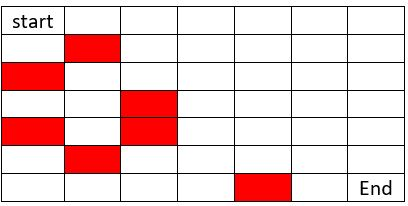

Note : 
1. Warna merah merupakan obstacle dimana tidak dapat dilewati 
2. start, merupakan titik awal 
3. end, merupakan titik akhir atau titik yang dituju

Note : 
berikut adalah gambar yang merepresentasikan 
1. parent
2. node
3. position

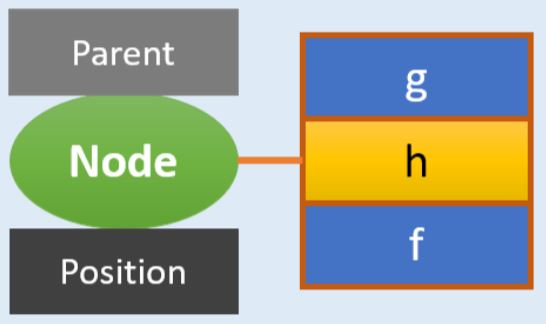

In [ ]:
import numpy as np

class Node:
    """
        Kelas Node untuk algoritma A* untuk menemukan jalur  
        parent adalah parent dari node saat ini
        posisi adalah posisi node saat ini di dalam maze (bidak / soal)
        g adalah variabel yang menyimpan biaya dari node awal hingga node saat ini
        h adalah perkiraan biaya berdasarkan heuristik untuk node saat ini ke node akhir
        f adalah total biaya node saat ini contoh. :  f = g + h
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position

In [ ]:
# Fungsi ini mengembalikan jalur pencarian
def return_path(current_node,maze):
    path = []
    no_rows, no_columns = np.shape(maze)
    # menginisialisasi maze hasil dengan nilai -1 disetiap posisinya
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    # mengembalikan jalur terbaik dari awal hingga akhir jalur
    path = path[::-1]
    start_value = 0
    # memperbarui jalur awal hingga akhir yang telah ditemukan oleh algoritma A* dimana disetiap langkah akan bertambah satu 1
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_value += 1
    return result


Note : berikut adalah gambar posisi didalam maze
1. go up 
2. go left
3. go down 
4. go right

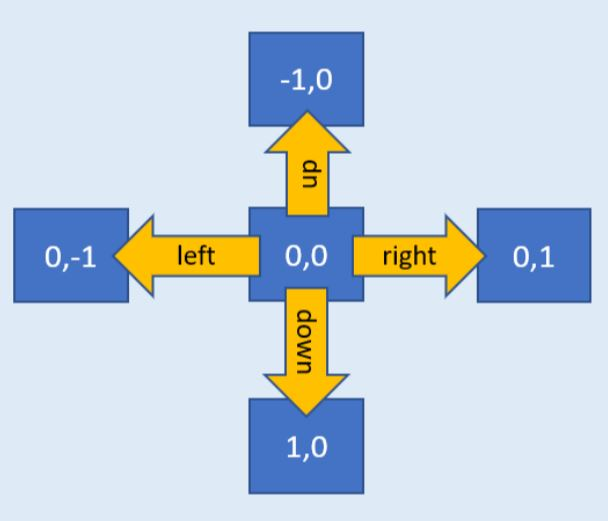

In [ ]:

def search(maze, cost, start, end):
    """
        mengembalikan list tuple sebagai jalur dari start node yang diberikan hingga end node 
        :param maze:
        :param cost
        :param start:
        :param end:
        :return:
    """

    # melakukan inisialisaai start node dan end node dengan nilai yang diinisialisasikan untuk g,h, dan f
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0

    # inisialisasi daftar yet_to_visit dan list yang dikunjungi
    # didalam list kita akan menempatkan semua node yang yet_to_visit untuk dilakukan eksplorasi 
    # disini kita akan menemukan biaya terendah node untuk dilanjutkan ke proses selanjutnya
    yet_to_visit_list = []  
    # dalam daftar ini akan dimasukkan node yang sudah dilakukan eksplorasi untuk tidak di eksplorasi kembali
    visited_list = [] 
    
    # menambahkan start node
    yet_to_visit_list.append(start_node)
    
    # Menambahkan kondisi untuk berhenti 
    # dilakukan eksekusi setelah beberapa langkah
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10

    # mencari kotak dalam maze. dengan gerakan pencarian kiri-kanan-atas-bawah 
    #4 gerakan dari setiap posisi

    move  =  [[-1, 0 ], # go up
              [ 0, -1], # go left
              [ 1, 0 ], # go down
              [ 0, 1 ]] # go right


    """
        1) pertama, mengambil node sekarang dengan membandingkan semua biaya f dan memilih node dengan biaya terendah untuk dilakukan eksplorasi lebih lanjut
        2) dilakukan pengecekan apakah iterasi maksimal telah tercapai. dan atur pesan lalu hentikan pengeksekusian kode
        3) hapus node yang telah dipilih/berada di list yet_to_visit dan tambahkan node ke daftar yang dikunjungi 
        4) uji performa test dan mengembalikan jalur yang lain dengan melakukan langkah-langkah dibawah ini
        5) untuk semua node yang dipilih (pindah untuk menemukan child)
            a) ambil posisi saat ini untuk memilih node
            b) cek apakah posisi benar valid (karena batas yang diberikan akan memberikan beberapa node yang invalid)
            c) jika node child dalam daftar pada variabel yet_to_visit, abaikan
            d) jika sebaliknya pindahkan child node ke daftar yet_to_visit
            
            untuk semua child node :
                a) jika child node didalam variabel visited list maka abaikan dan coba ke node berikutnya
                b) hitung nilai child node pada vriabel g, f, h
                c) jika child node dalam daftar yet_to_visit maka abaikan saja
                d) jika sebaliknya pindahkan child node ke list yet_to_visit
    """
    #maze memiliki beberapa baris dan kolom
    no_rows, no_columns = np.shape(maze)
    
    # lakukan loop hingga menemukan akhir node
    
    while len(yet_to_visit_list) > 0:
        
        # setiap kali ada node yang merujuk dari list yet_to_visit, setiap kali loop dlakuka outer_iteration akan bertambah satu
        outer_iterations += 1    

        
        # ambil node saat ini
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                
        #  jika nilai outer_iteration melebihi nilai max_iteration
        # maka akan mereturn current_node, dan maze
        if outer_iterations > max_iterations:
            print ("giving up on pathfinding too many iterations")
            return return_path(current_node,maze)

        # keluarkan node saat ini dari list yet_to_visit, dan tambahkan ke daftar yang dikunjungi
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)

        # jika current_node == end_node maka kembalikan current_node
        if current_node == end_node:
            return return_path(current_node,maze)

        children = []

        for new_position in move: 

            # mengambil posisi node
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # pastikan node masih dalam maze
            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue

            # periksa apakah node masih dalam batas maze (labirin)
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # membuat nod ebaru
            new_node = Node(current_node, node_position)

            # tambahkan ke variabel new_node
            children.append(new_node)

        # loop semua children
        for child in children:
            
            if len([visited_child for visited_child in visited_list if visited_child == child]) > 0:
                continue

            # manembahkan nilai pada variabel f, g, and h 
            child.g = current_node.g + cost
            ## nilai heuristic dihitung disini, dimana menggunakan nilai euclidean
            child.h = (((child.position[0] - end_node.position[0]) ** 2) + 
                       ((child.position[1] - end_node.position[1]) ** 2)) 

            child.f = child.g + child.h

            if len([i for i in yet_to_visit_list if child == i and child.g > i.g]) > 0:
                continue

            # tambahkan child node kedalam yet_to_visit_list
            yet_to_visit_list.append(child)


if __name__ == '__main__':

    maze = [[0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0],  # 0 merupakan area tanpa obstacle, sedangkan 1 merupakan obstacle yang tidak boleh dilewati 
            [1, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0],
            [1, 0, 1, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0],]
    
    start = [0, 0] # starting position
    end = [6,6] # ending position
    cost = 1 # cost per movement

    path = search(maze,cost, start, end)
    print(path)

[[0, 1, 2, -1, -1, -1, -1], [-1, -1, 3, -1, -1, -1, -1], [-1, -1, 4, 5, -1, -1, -1], [-1, -1, -1, 6, -1, -1, -1], [-1, -1, -1, 7, 8, -1, -1], [-1, -1, -1, -1, 9, 10, -1], [-1, -1, -1, -1, -1, 11, 12]]


In [ ]:
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))

  0  1  2 -1 -1 -1 -1
 -1 -1  3 -1 -1 -1 -1
 -1 -1  4  5 -1 -1 -1
 -1 -1 -1  6 -1 -1 -1
 -1 -1 -1  7  8 -1 -1
 -1 -1 -1 -1  9 10 -1
 -1 -1 -1 -1 -1 11 12


 0  1  2 -1 -1 -1 -1
 
 -1 -1  3 -1 -1 -1 -1
 
 -1 -1  4  5 -1 -1 -1
 
 -1 -1 -1  6 -1 -1 -1
 
 -1 -1 -1  7  8 -1 -1
 
 -1 -1 -1 -1  9 10 -1
 
 -1 -1 -1 -1 -1 11 12

Note : 
1. fokus pada angka 0-12 karena itu merupakan jalur yang dihasilkan dari algoritma A star search 


# Referensi yang digunakan
0. Heuristic Search : https://en.wikipedia.org/wiki/Heuristic_(computer_science), Agus Eko Minarno
1. Best First Search : https://www.geeksforgeeks.org/best-first-search-informed-search/
2. Greedy Best First Search : http://python.algorithmexamples.com/web/graphs/greedy_best_first.html, https://www.youtube.com/watch?v=qYP6fR8BoxY&feature=emb_imp_woyt
3. A Star Search (A* Search) : https://towardsdatascience.com/a-star-a-search-algorithm-eb495fb156bb